<a href="https://colab.research.google.com/github/LeelaNandhaKishore1511/RL-Lab-Sem-5/blob/main/RL_EXPT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [ ]:
class MultiArmedBanditEnv:
  def __init__(self, n_arms = 10):
    self.n_arms = n_arms
    self.q_true = np.random.normal(0, 1, n_arms)
    self.best_action = np.argmax(self.q_true)
    self.reset()

  def reset(self):
    return None

  def step(self, action):
    reward = np.random.normal(self.q_true[action], 1)
    return None, reward, False, False, {}

In [ ]:
def run_epsilon_greedy(env, episode = 500, epsilon = 0.1):
  k, Q, N, rewards = env.n_arms, np.zeros(env.n_arms), np.zeros(env.n_arms), []

  for _ in range(episode):
    env.reset()
    action = np.random.choice(k) if np.random.random() < epsilon else np.argmax(Q)
    _, reward, _, _, _ = env.step(action)
    N[action] += 1
    Q[action] += (reward - Q[action])/N[action]
    rewards.append(reward)
  return Q, rewards

In [ ]:
def run_softmax(env, episodes=500, temperature=0.5):
    k = env.n_arms
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []
    for _ in range(episodes):
        env. reset()
        exp_q = np.exp((Q - np.max(Q)) / temperature)
        probabilities = exp_q / np.sum(exp_q)
        action = np.random.choice(k, p=probabilities)
        _, reward, _, _, _  = env.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)
    return Q, rewards

Epsilon-Greedy Q-values: [ 0.72063695 -0.44906078 -0.65896527 -0.08206332  0.52399827  1.10270785
  1.23568066  0.394969   -1.3603667   1.9999786 ]
Total reward (Epsilon-Greedy): 842.79

Softmax Q-values: [-0.01671679 -0.29398361 -2.24765966 -0.59136845  0.73355602  1.06908162
  1.39687746  0.75512002 -1.8528811   2.04235545]
Total reward (Softmax): 829.88


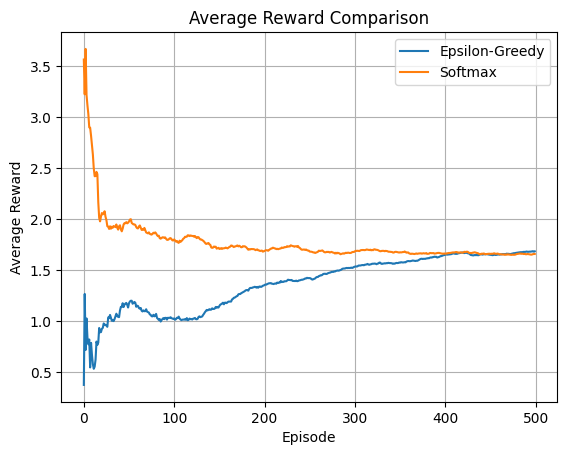

In [ ]:
env = MultiArmedBanditEnv(n_arms=10)
q_eps, rewards_eps = run_epsilon_greedy(env, episode=500, epsilon=0.1)
q_soft, rewards_soft = run_softmax(env, episodes=500, temperature=0.5)
print("Epsilon-Greedy Q-values:", q_eps)
print("Total reward (Epsilon-Greedy):", round(sum(rewards_eps), 2))
print("\nSoftmax Q-values:", q_soft)
print("Total reward (Softmax):", round(sum(rewards_soft), 2))
avg_reward_eps = np.cumsum(rewards_eps) / (np.arange(len(rewards_eps)) + 1)
avg_reward_soft = np.cumsum(rewards_soft) / (np.arange(len(rewards_soft)) + 1)
plt.plot(avg_reward_eps, label='Epsilon-Greedy')
plt.plot(avg_reward_soft, label='Softmax' )
plt.xlabel("Episode")
plt.ylabel('Average Reward' )
plt.title('Average Reward Comparison')
plt. legend()
plt.grid(True)
plt.show()